# Import Required Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # regular expression
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import nltk

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Data Import

In [2]:
#Import the data set
df=pd.read_csv('blogtext.csv')

In [3]:
# see few rows of the imported dataset
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [4]:
# Check the number of rows and columns
df.shape

(681284, 7)

In [5]:
#Check Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
id        681284 non-null int64
gender    681284 non-null object
age       681284 non-null int64
topic     681284 non-null object
sign      681284 non-null object
date      681284 non-null object
text      681284 non-null object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [6]:
# Check for missing values present
print('Number of missing values across columns-\n', df.isnull().sum())

Number of missing values across columns-
 id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64


There are 68,124 records which is large in size to perform analysis and computation, hence we are going to take a subset and rerun with the entire data-set once all errors are fixed and optimization is done

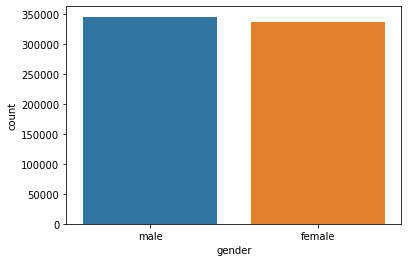

In [7]:
# Checking gendre distribution
sns.countplot(x='gender',data=df)

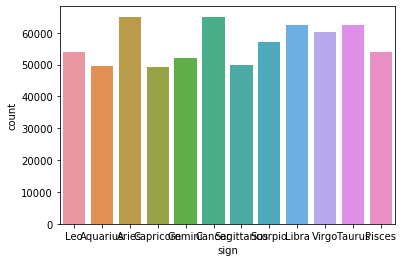

In [8]:
# Checking sign distribution
sns.countplot(x='sign',data=df)

In [9]:
# Creation of data sub-set
data=df.head(15000)

In [10]:
# dropping non value added variables - id & date
data.drop(['id','date'], axis=1, inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
# looking at few rows post dropping non value added variables
data.head()

,gender,age,topic,sign,text
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,..."
1,male,15,Student,Leo,These are the team members: Drewe...
2,male,15,Student,Leo,In het kader van kernfusie op aarde...
3,male,15,Student,Leo,testing!!! testing!!!
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...


In [12]:
# converting "age" from int to object
data['age']=data['age'].astype('object')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
# check to ensure all columns in object type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
gender    15000 non-null object
age       15000 non-null object
topic     15000 non-null object
sign      15000 non-null object
text      15000 non-null object
dtypes: object(5)
memory usage: 586.1+ KB


# Data Wrangling for data['text'] column to remove all unwanted text from the column

In [14]:
# remove unwanted chars other than alphanumeric
data['clean_data']=data['text'].apply(lambda x: re.sub(r'[^A-Za-z]+',' ',x))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
# covert text to lower
data['clean_data']=data['clean_data'].apply(lambda x: x.lower())

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
# remove unwanted spaces
data['clean_data']=data['clean_data'].apply(lambda x: x.strip())

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
print("Actual data=======> {}".format(data['text'][1]))

Actual data=======>            These are the team members:   Drewes van der Laag           urlLink mail  Ruiyu Xie                     urlLink mail  Bryan Aaldering (me)          urlLink mail          


# Remove all stopwords

In [18]:
#remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Shivang
[nltk_data]     Shrivastav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
stopwords=set(stopwords.words('english'))

In [20]:
data['clean_data']=data['clean_data'].apply(lambda x: ' '.join([words for words in x.split() if words not in stopwords]))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
data['clean_data'][6]

'somehow coca cola way summing things well early flagship jingle like buy world coke tune like teach world sing pretty much summed post woodstock era well add much sales catchy tune korea coke theme urllink stop thinking feel pretty much sums lot korea koreans look relaxed couple stopped thinking started feeling course high regard education math logic deep think many koreans really like work emotion anything else westerners seem sublimate moreso least display different way maybe scratch westerners koreans probably pretty similar context different anyways think losing korea repeat stop thinking feel stop thinking feel stop thinking feel everything alright'

# Merging all other cols into label col.

In [22]:
# merging cols. gender, age, topic and sign into lables col
data['labels']=data.apply(lambda col: [col['gender'],str(col['age']),col['topic'],col['sign']], axis=1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
# look at data set post merging cols
data.head()

,gender,age,topic,sign,text,clean_data,labels
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]"
1,male,15,Student,Leo,These are the team members: Drewe...,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,male,15,Student,Leo,testing!!! testing!!!,testing testing,"[male, 15, Student, Leo]"
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks yahoo toolbar capture urls popups means...,"[male, 33, InvestmentBanking, Aquarius]"


In [24]:
# retain data set with two pre-processed columns 
data=data[['clean_data','labels']]

In [25]:
data.head()

,clean_data,labels
0,info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoo toolbar capture urls popups means...,"[male, 33, InvestmentBanking, Aquarius]"


# Splitting the data into X and Y

In [26]:
X=data['clean_data']

In [27]:
Y=data['labels']

perform count vectorizer with bi-grams and tri-grams to get the count vectors of the X data

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
vectorizer=CountVectorizer(binary=True, ngram_range=(1,2))

In [30]:
X=vectorizer.fit_transform(X)

In [31]:
X[1]

<1x963236 sparse matrix of type '<class 'numpy.int64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [32]:
# check feature names post vectorization
vectorizer.get_feature_names()[:6]

['aa', 'aa advert', 'aa amazing', 'aa anger', 'aa batteries', 'aa compared']

In [33]:
label_counts=dict()

for labels in data.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[label]+=1
        else:
            label_counts[label]=1

In [34]:
label_counts

{'male': 8550,
 '15': 771,
 'Student': 1680,
 'Leo': 880,
 '33': 427,
 'InvestmentBanking': 70,
 'Aquarius': 941,
 'female': 6450,
 '14': 309,
 'indUnk': 5511,
 'Aries': 4732,
 '25': 1021,
 'Capricorn': 596,
 '17': 1705,
 'Gemini': 412,
 '23': 1540,
 'Non-Profit': 150,
 'Cancer': 1132,
 'Banking': 61,
 '37': 37,
 'Sagittarius': 1589,
 '26': 420,
 '24': 1330,
 'Scorpio': 1232,
 '27': 1480,
 'Education': 609,
 '45': 38,
 'Engineering': 330,
 'Libra': 705,
 'Science': 78,
 '34': 827,
 '41': 46,
 'Communications-Media': 99,
 'BusinessServices': 148,
 'Sports-Recreation': 80,
 'Virgo': 615,
 'Taurus': 1019,
 'Arts': 289,
 'Pisces': 1147,
 '44': 3,
 '16': 670,
 'Internet': 652,
 'Museums-Libraries': 66,
 'Accounting': 35,
 '39': 102,
 '35': 2357,
 'Technology': 2802,
 '36': 1722,
 'Law': 44,
 '46': 17,
 'Consulting': 57,
 'Automotive': 14,
 '42': 25,
 'Religion': 28,
 '13': 92,
 'Fashion': 1622,
 '38': 46,
 '43': 6,
 'Publishing': 67,
 '40': 1,
 'Marketing': 207,
 'LawEnforcement-Security': 

# Pre-processing the labels

In [35]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [36]:
Y=binarizer.fit_transform(data.labels)

# Splitting the data into 80% Train set :20% Test set

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,random_state=2,test_size = 0.2)

In [39]:
print(Xtrain.shape)
print(Ytrain.shape)

(12000, 963236)
(12000, 71)


In [40]:
print(Xtest.shape)
print(Ytest.shape)

(3000, 963236)
(3000, 71)


In [41]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# Building classification model

In [42]:
model=LogisticRegression(solver='lbfgs')

In [43]:
model=OneVsRestClassifier(model)

In [44]:
model.fit(Xtrain,Ytrain)

C:\Users\Shivang Shrivastav\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


OneVsRestClassifier(estimator=LogisticRegression())

In [45]:
Ypred=model.predict(Xtest)

In [46]:
Ypred_inversed = binarizer.inverse_transform(Ypred)
y_test_inversed = binarizer.inverse_transform(Ytest)

# Printing True vs Predicted label

In [47]:
for i in range(5):
    print('Text:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        Xtest[i],
        ','.join(y_test_inversed[i]),
        ','.join(Ypred_inversed[i])
    ))

Text:	  (0, 889281)	1
  (0, 676067)	1
  (0, 846198)	1
  (0, 310077)	1
  (0, 895223)	1
  (0, 111781)	1
  (0, 878019)	1
  (0, 586707)	1
  (0, 861450)	1
  (0, 179818)	1
  (0, 56954)	1
  (0, 577209)	1
  (0, 936620)	1
  (0, 296328)	1
  (0, 941721)	1
  (0, 828715)	1
  (0, 630358)	1
  (0, 307451)	1
  (0, 663459)	1
  (0, 721346)	1
  (0, 901777)	1
  (0, 320534)	1
  (0, 193214)	1
  (0, 818017)	1
  (0, 321218)	1
  :	:
  (0, 163234)	1
  (0, 307662)	1
  (0, 848941)	1
  (0, 321253)	1
  (0, 468278)	1
  (0, 160228)	1
  (0, 321443)	1
  (0, 475574)	1
  (0, 320181)	1
  (0, 830161)	1
  (0, 212395)	1
  (0, 546637)	1
  (0, 506279)	1
  (0, 448766)	1
  (0, 194974)	1
  (0, 895748)	1
  (0, 721451)	1
  (0, 103184)	1
  (0, 570066)	1
  (0, 417004)	1
  (0, 64902)	1
  (0, 439964)	1
  (0, 321206)	1
  (0, 58893)	1
  (0, 141207)	1
True labels:	36,Aries,Fashion,male
Predicted labels:	36,Aries,Fashion,male


Text:	  (0, 370678)	1
  (0, 29374)	1
  (0, 427433)	1
  (0, 370696)	1
  (0, 29403)	1
True labels:	35,Aries,Technolo

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def print_evaluation_scores_micro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: ', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: ', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: ', recall_score(Ytest, Ypred, average='micro'))

In [50]:
print_evaluation_scores_micro(Ytest, Ypred)

Accuracy score:  0.22433333333333333
F1 score:  0.5760196455263721
Average precision score:  0.3913038167856416
Average recall score:  0.44958333333333333


In [51]:
def print_evaluation_scores_macro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: ', f1_score(Ytest, Ypred, average='macro'))
    print('Average precision score: ', average_precision_score(Ytest, Ypred, average='macro'))
    print('Average recall score: ', recall_score(Ytest, Ypred, average='macro'))

In [52]:
print_evaluation_scores_macro(Ytest, Ypred)

Accuracy score:  0.22433333333333333
F1 score:  0.21039969126517238


C:\Users\Shivang Shrivastav\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\Shivang Shrivastav\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Average precision score:  nan
Average recall score:  0.15171486746160326


C:\Users\Shivang Shrivastav\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
def print_evaluation_scores_weighted(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: ', f1_score(Ytest, Ypred, average='weighted'))
    print('Average precision score: ', average_precision_score(Ytest, Ypred, average='weighted'))
    print('Average recall score: ', recall_score(Ytest, Ypred, average='weighted'))

In [54]:
print_evaluation_scores_weighted(Ytest, Ypred)

Accuracy score:  0.22433333333333333
F1 score:  0.5263279598664317
Average precision score:  0.4478216414818515
Average recall score:  0.44958333333333333


C:\Users\Shivang Shrivastav\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\Shivang Shrivastav\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\Shivang Shrivastav\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Print true label and predicted label for any five examples

In [55]:
preds = Ypred[:15]
actuals = Ytest[:15]

five_actual = binarizer.inverse_transform(actuals)
five_actual

[('36', 'Aries', 'Fashion', 'male'),
 ('35', 'Aries', 'Technology', 'male'),
 ('26', 'Scorpio', 'Technology', 'male'),
 ('17', 'Leo', 'Student', 'female'),
 ('35', 'Aries', 'Technology', 'male'),
 ('17', 'Leo', 'female', 'indUnk'),
 ('17', 'Scorpio', 'female', 'indUnk'),
 ('16', 'Taurus', 'female', 'indUnk'),
 ('14', 'Sagittarius', 'indUnk', 'male'),
 ('36', 'Aries', 'Fashion', 'male'),
 ('17', 'Arts', 'Leo', 'female'),
 ('35', 'Aries', 'Technology', 'male'),
 ('15', 'Pisces', 'Student', 'female'),
 ('14', 'Sagittarius', 'indUnk', 'male'),
 ('15', 'Libra', 'Student', 'female')]

In [56]:
five_pred = binarizer.inverse_transform(preds)
five_pred

[('36', 'Aries', 'Fashion', 'male'),
 ('Aries', 'male'),
 ('male',),
 ('female', 'indUnk'),
 ('male',),
 ('male',),
 ('female', 'indUnk'),
 ('16', 'Student', 'female'),
 ('indUnk', 'male'),
 ('male',),
 ('female',),
 ('35', 'Aries', 'Technology', 'male'),
 ('male',),
 ('male',),
 ('Aries', 'Libra', 'male')]

# Print true label and predicted label for any five examples

In [57]:
print(binarizer.inverse_transform(Ypred)[777])
print(binarizer.inverse_transform(Ytest)[777])

('Technology', 'male')
('27', 'Taurus', 'female', 'indUnk')


In [58]:
print(binarizer.inverse_transform(Ypred)[614])
print(binarizer.inverse_transform(Ytest)[614])

('27', 'female', 'indUnk')
('24', 'Scorpio', 'female', 'indUnk')


In [59]:
print(binarizer.inverse_transform(Ypred)[199])
print(binarizer.inverse_transform(Ytest)[199])

('female',)
('16', 'Aries', 'Student', 'female')


In [60]:
print(binarizer.inverse_transform(Ypred)[420])
print(binarizer.inverse_transform(Ytest)[420])

('Aries', 'male')
('35', 'Aries', 'Technology', 'male')


In [61]:
print(binarizer.inverse_transform(Ypred)[600])
print(binarizer.inverse_transform(Ytest)[600])

('male',)
('23', 'Arts', 'Capricorn', 'female')


# Print true label and predicted label for any five examples

In [62]:
import random
j=[]
for i in range(5):
 j.append(random.randint(300,len(Ypred)))

print(j)
for k in j:
 print(binarizer.inverse_transform(Ypred)[k])
 print(binarizer.inverse_transform(Ytest)[k])

[2354, 1523, 1709, 412, 2033]
('male',)
('35', 'Aries', 'Technology', 'male')
('36', 'Aries', 'Fashion', 'male')
('36', 'Aries', 'Fashion', 'male')
('Cancer', 'female', 'indUnk')
('25', 'Aquarius', 'female', 'indUnk')
('Scorpio', 'female')
('17', 'Scorpio', 'female', 'indUnk')
('male',)
('45', 'Sagittarius', 'female', 'indUnk')


In [63]:
Ypred_inversed = binarizer.inverse_transform(Ypred)
Ytest_inversed = binarizer.inverse_transform(Ytest)
for i in range(5):
 print('Text:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
 Xtest[i],
 ','.join(Ytest_inversed[i]),
 ','.join(Ypred_inversed[i])
 ))

Text:	  (0, 889281)	1
  (0, 676067)	1
  (0, 846198)	1
  (0, 310077)	1
  (0, 895223)	1
  (0, 111781)	1
  (0, 878019)	1
  (0, 586707)	1
  (0, 861450)	1
  (0, 179818)	1
  (0, 56954)	1
  (0, 577209)	1
  (0, 936620)	1
  (0, 296328)	1
  (0, 941721)	1
  (0, 828715)	1
  (0, 630358)	1
  (0, 307451)	1
  (0, 663459)	1
  (0, 721346)	1
  (0, 901777)	1
  (0, 320534)	1
  (0, 193214)	1
  (0, 818017)	1
  (0, 321218)	1
  :	:
  (0, 163234)	1
  (0, 307662)	1
  (0, 848941)	1
  (0, 321253)	1
  (0, 468278)	1
  (0, 160228)	1
  (0, 321443)	1
  (0, 475574)	1
  (0, 320181)	1
  (0, 830161)	1
  (0, 212395)	1
  (0, 546637)	1
  (0, 506279)	1
  (0, 448766)	1
  (0, 194974)	1
  (0, 895748)	1
  (0, 721451)	1
  (0, 103184)	1
  (0, 570066)	1
  (0, 417004)	1
  (0, 64902)	1
  (0, 439964)	1
  (0, 321206)	1
  (0, 58893)	1
  (0, 141207)	1
True labels:	36,Aries,Fashion,male
Predicted labels:	36,Aries,Fashion,male


Text:	  (0, 370678)	1
  (0, 29374)	1
  (0, 427433)	1
  (0, 370696)	1
  (0, 29403)	1
True labels:	35,Aries,Technolo

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [66]:
def build_model_train(Xtrain, Ytrain, X_valid=None, y_valid=None, C=1.0, model='lr'):
    if model=='lr':
        model = LogisticRegression(C=C, penalty='l1', dual=False, solver='liblinear')
        model = OneVsRestClassifier(model)
        model.fit(Xtrain, Ytrain)

    elif model=='svm':
        model = LinearSVC(C=C, penalty='l1', dual=False, loss='squared_hinge')
        model = OneVsRestClassifier(model)
        model.fit(Xtrain, Ytrain)

    elif model=='nbayes':
        model = MultinomialNB(alpha=1.0)
        model = OneVsRestClassifier(model)
        model.fit(Xtrain, Ytrain)

    elif model=='lda':
        model = LinearDiscriminantAnalysis(solver='svd')
        model = OneVsRestClassifier(model)
        model.fit(Xtrain, Ytrain)

    return model

models = ['lr','svm','nbayes']
for model in models:
    model = build_model_train(Xtrain,Ytrain,model=model)
    model.fit(Xtrain,Ytrain)
    Ypred=model.predict(Xtest)
    print("\n")
    print(f"**displaying metrics for the mode {model}\n")
    print_evaluation_scores_micro(Ytest, Ypred)
    print("\n")
    print("\n")
    print_evaluation_scores_macro(Ytest, Ypred)
    print("\n")
    print("\n")
    print_evaluation_scores_weighted(Ytest,Ypred)
    print("\n")
    print("\n")



**displaying metrics for the mode OneVsRestClassifier(estimator=LogisticRegression(penalty='l1',
                                                 solver='liblinear'))

Accuracy score:  0.25966666666666666
F1 score:  0.6150803461063041
Average precision score:  0.41911588681022305
Average recall score:  0.5183333333333333




Accuracy score:  0.25966666666666666
F1 score:  0.3494264130402505


C:\Users\Shivang Shrivastav\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\Shivang Shrivastav\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Average precision score:  nan
Average recall score:  0.26844088074577427




Accuracy score:  0.25966666666666666
F1 score:  0.5911279306144901


C:\Users\Shivang Shrivastav\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shivang Shrivastav\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\Shivang Shrivastav\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Average precision score:  0.4762317764922889
Average recall score:  0.5183333333333333






C:\Users\Shivang Shrivastav\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shivang Shrivastav\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Shivang Shrivastav\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)




**displaying metrics for the mode OneVsRestClassifier(estimator=LinearSVC(dual=False, penalty='l1'))

Accuracy score:  0.24266666666666667
F1 score:  0.61328125
Average precision score:  0.410115823220014
Average recall score:  0.5364166666666667




Accuracy score:  0.24266666666666667
F1 score:  0.3869051280279062


C:\Users\Shivang Shrivastav\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\Shivang Shrivastav\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Average precision score:  nan
Average recall score:  0.3072517483465692




Accuracy score:  0.24266666666666667
F1 score:  0.5952610259515645


C:\Users\Shivang Shrivastav\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shivang Shrivastav\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\Shivang Shrivastav\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\Shivang Shrivastav\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: R

Average precision score:  0.4695396525447029
Average recall score:  0.5364166666666667






**displaying metrics for the mode OneVsRestClassifier(estimator=MultinomialNB())

Accuracy score:  0.082
F1 score:  0.44578246699442087
Average precision score:  0.25970613909575757
Average recall score:  0.33625




Accuracy score:  0.082
F1 score:  0.09100237658956262


C:\Users\Shivang Shrivastav\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\Shivang Shrivastav\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score:  nan
Average recall score:  0.06956313606420159




Accuracy score:  0.082
F1 score:  0.3843547719055087
Average precision score: 

C:\Users\Shivang Shrivastav\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\Shivang Shrivastav\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 0.3509235503607184
Average recall score:  0.33625






# Key Summary
Multilabel classication problem that predicts multiple features of the author of a
given text was solved. 
Loading the data and required basic EDA and data inspection has been done 
The text has been pre processed by cleansing it (removing the unnecessary chars, removing the spaces,
converting the case to lower) and also removing the stop words, vectorizing 
The features Preparing the date, splitting them to train and test using multilable binarizers, also various classier models
are trained and the predictions are made and also the accuracy, f1 score, Avg precision and recall
scores are calculated